In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
import time
from sklearn.model_selection import GridSearchCV


import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

import pylab as pl

import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.svm import SVC # "Support vector classifier"

In [2]:
# reading the CSV file into pandas dataframe
vehicle_df = pd.read_csv("vehicle_1.csv") 

vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


## Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [3]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

#### Label encoding the categorical feature 'class'

In [4]:
le = preprocessing.LabelEncoder()
vehicle_df['class'] = le.fit_transform(vehicle_df['class'])
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


In [5]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int32
dtype: object

#### Number of missing values in each column

In [6]:
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### Dropping the missing values

In [7]:
vehicle_df.dropna(inplace=True)

In [8]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
vehicle_class_df = vehicle_df['class']

In [10]:
collectn_1 = vehicle_df['compactness']

In [11]:
collectn_2 = vehicle_df['circularity']

In [12]:
collectn_3 = vehicle_df['distance_circularity']

In [13]:
collectn_4 = vehicle_df['radius_ratio']

In [14]:
collectn_5 = vehicle_df['pr.axis_aspect_ratio']

In [15]:
collectn_6 = vehicle_df['max.length_aspect_ratio']

In [16]:
collectn_7 = vehicle_df['scatter_ratio']

In [17]:
collectn_8 = vehicle_df['elongatedness']

In [18]:
collectn_9 = vehicle_df['pr.axis_rectangularity']

In [19]:
collectn_10 = vehicle_df['max.length_rectangularity']

In [20]:
collectn_11 = vehicle_df['scaled_variance']

In [21]:
collectn_12 = vehicle_df['scaled_variance.1']

In [22]:
collectn_13 = vehicle_df['scaled_radius_of_gyration']

In [23]:
collectn_14 = vehicle_df['scaled_radius_of_gyration.1']

In [24]:
collectn_15 = vehicle_df['skewness_about']

In [25]:
collectn_16 = vehicle_df['skewness_about.1']

In [26]:
collectn_17 = vehicle_df['skewness_about.2']

In [27]:
collectn_18 = vehicle_df['hollows_ratio']

In [28]:
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4, collectn_5, collectn_6, collectn_7, collectn_8,
                collectn_9, collectn_10, collectn_11, collectn_12, collectn_13, collectn_14, collectn_15, collectn_16,
                collectn_17, collectn_18]

#### Box plot for all features to check for outliers

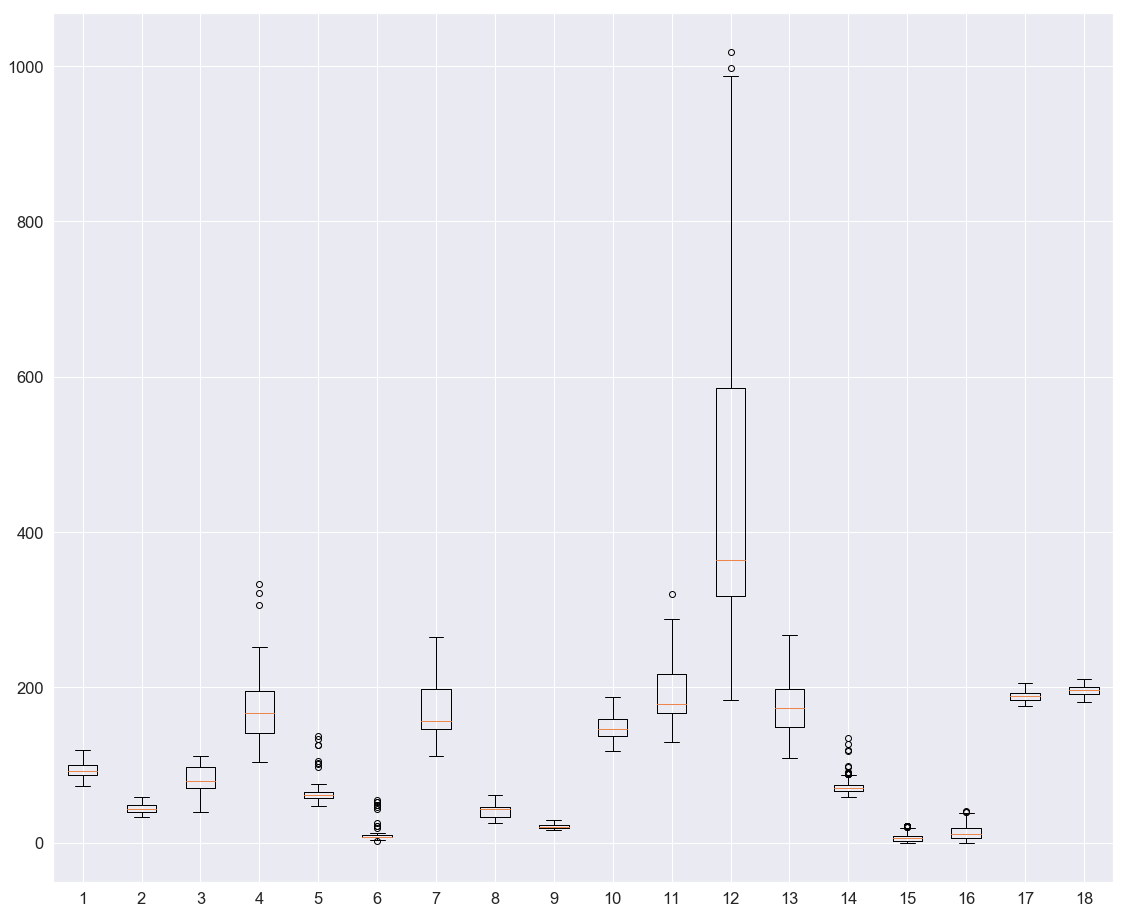

In [29]:
# Create a figure instance
fig = plt.figure(1, figsize=(19, 16))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [30]:
vehicle_df['class'].value_counts()

1    413
0    205
2    195
Name: class, dtype: int64

#### Replacing outliers with median values

In [31]:
median = vehicle_df.median()
std = vehicle_df.std()
value = vehicle_df

outliers = (value - median).abs() > 2*std

vehicle_df[outliers] = np.nan
vehicle_df.fillna(median, inplace=True)

In [32]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,2
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,2
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,2
4,85.0,44.0,70.0,205.0,61.0,8.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,71.0,9.0,11.0,180.0,183.0,0


#### Standardizing the data

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(vehicle_df)
vehicle_df = pd.DataFrame(scaled_data, index=vehicle_df.index, columns=vehicle_df.columns)
vehicle_df.head()

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.246533,0.597797,0.053004,0.317429,1.910784,0.900394,-0.105385,0.108908,-0.160827,0.880614,-0.347188,-0.207494,0.418206,-0.261830,0.069861,0.645322,-0.300186,0.118171,1.443415
1,-0.286529,-0.600113,0.117514,-0.852454,-0.750782,0.420381,-0.546848,0.513828,-0.588121,-0.297644,-0.567907,-0.547810,-0.470598,0.094136,0.813921,0.368828,0.048708,0.404102,1.443415
2,1.445924,0.940057,1.536731,1.297601,0.846157,0.900394,1.422758,-1.240825,1.121057,0.806973,1.381783,1.570485,1.648857,0.272119,2.054022,-0.322406,-0.125739,-0.024795,0.017538
3,-0.019998,-0.600113,-0.011505,-0.283321,0.313844,0.420381,-0.716642,0.648802,-0.588121,-0.297644,-0.935773,-0.693660,-1.530325,-1.507710,0.069861,-0.184159,1.793174,1.547827,1.443415
4,-1.086123,-0.086723,-0.785624,1.171127,-0.041031,-0.059633,-0.546848,0.513828,-0.588121,-0.224003,2.043941,-0.582537,0.554945,-0.083847,0.813921,-0.045912,-1.521312,-1.883348,-1.408339


## Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [34]:
vehicle_df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.640698,0.750560,0.717217,0.225318,0.501356,0.730422,-0.734859,0.750360,0.626901,0.700599,0.696260,0.509950,-0.230494,0.145682,0.156917,0.328330,0.363586,-0.016478
circularity,0.640698,1.000000,0.755328,0.617945,0.205037,0.567517,0.773607,-0.761653,0.788876,0.915989,0.748734,0.719475,0.884761,0.086426,0.141221,0.024362,-0.057171,0.070344,-0.142244
distance_circularity,0.750560,0.755328,1.000000,0.802287,0.247788,0.661665,0.855306,-0.871814,0.875982,0.727049,0.853704,0.805443,0.661668,-0.173373,0.100640,0.224184,0.162124,0.289702,-0.060894
radius_ratio,0.717217,0.617945,0.802287,1.000000,0.654145,0.493046,0.803528,-0.840285,0.795934,0.543788,0.841715,0.764232,0.537339,-0.351662,0.032458,0.152155,0.444414,0.473901,-0.229934
pr.axis_aspect_ratio,0.225318,0.205037,0.247788,0.654145,1.000000,0.149041,0.301468,-0.363432,0.265899,0.137066,0.339748,0.290919,0.201196,-0.261914,-0.053213,-0.016065,0.411284,0.348199,-0.234235
max.length_aspect_ratio,0.501356,0.567517,0.661665,0.493046,0.149041,1.000000,0.624248,-0.567601,0.649123,0.606614,0.600651,0.568774,0.493760,-0.270235,0.069184,0.126391,0.108271,0.386386,0.338635
scatter_ratio,0.730422,0.773607,0.855306,0.803528,0.301468,0.624248,1.000000,-0.928675,0.948643,0.722577,0.937844,0.930305,0.710251,-0.118715,0.066092,0.188966,0.146034,0.266116,-0.202080
elongatedness,-0.734859,-0.761653,-0.871814,-0.840285,-0.363432,-0.567601,-0.928675,1.000000,-0.937323,-0.680056,-0.934838,-0.870670,-0.712396,0.108651,-0.051255,-0.184213,-0.183591,-0.270940,0.302515
pr.axis_rectangularity,0.750360,0.788876,0.875982,0.795934,0.265899,0.649123,0.948643,-0.937323,1.000000,0.712048,0.938502,0.873204,0.736610,-0.084952,0.073805,0.197298,0.100344,0.232852,-0.171042
max.length_rectangularity,0.626901,0.915989,0.727049,0.543788,0.137066,0.606614,0.722577,-0.680056,0.712048,1.000000,0.665113,0.684999,0.811883,0.090974,0.118856,0.036624,-0.066895,0.078891,-0.028360


In [74]:
# Highly -ve to highly +ve correlation
vehicle_df.corr().unstack().sort_values().drop_duplicates()

# attributes that have high correlation (absolute value > 0.5) should not be used in the analysis of the model 
# as this will lead to huge amount of bias in the data and would result in an overfit model 
# that would fail to generalize in production

elongatedness                pr.axis_rectangularity        -0.937323
scaled_variance              elongatedness                 -0.934838
elongatedness                scatter_ratio                 -0.928675
distance_circularity         elongatedness                 -0.871814
elongatedness                scaled_variance.1             -0.870670
                             radius_ratio                  -0.840285
hollows_ratio                scaled_radius_of_gyration.1   -0.830605
scaled_radius_of_gyration.1  skewness_about.2              -0.763116
elongatedness                circularity                   -0.761653
compactness                  elongatedness                 -0.734859
scaled_radius_of_gyration    elongatedness                 -0.712396
max.length_rectangularity    elongatedness                 -0.680056
elongatedness                max.length_aspect_ratio       -0.567601
                             pr.axis_aspect_ratio          -0.363432
radius_ratio                 scale

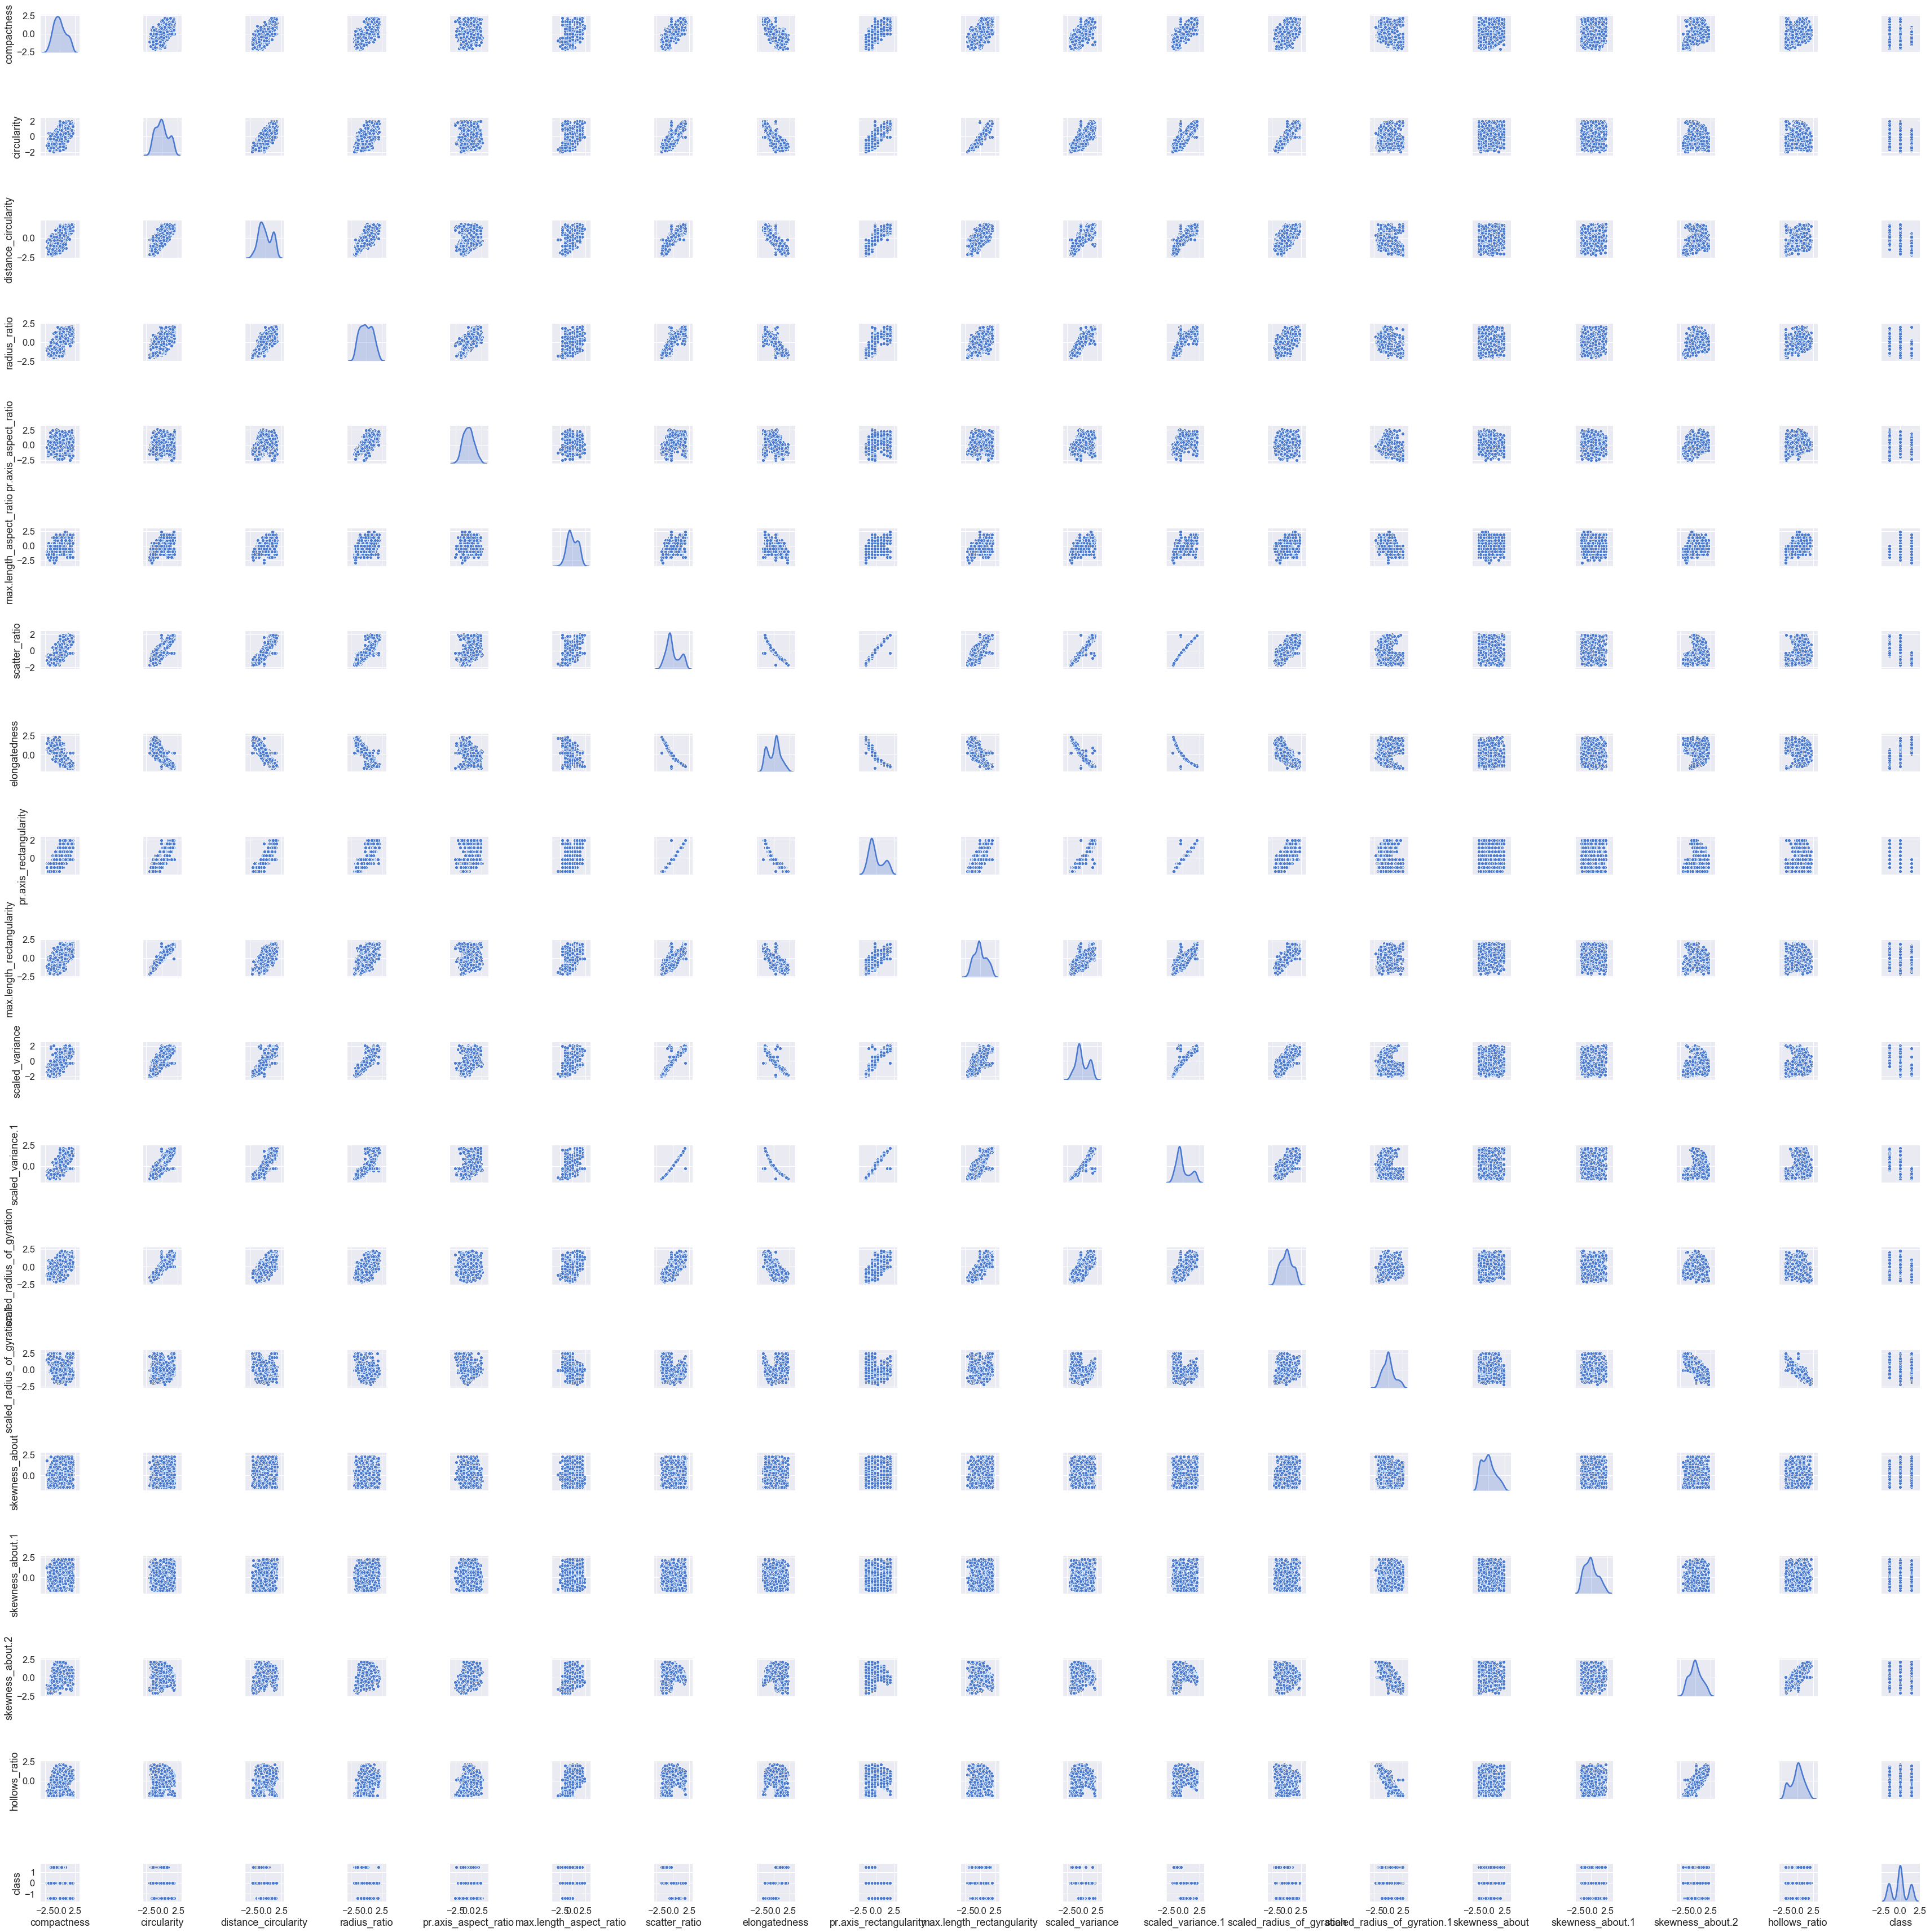

In [35]:
sns.pairplot(vehicle_df, diag_kind='kde')

In [36]:
# from above pairplot we can see that several independent variables are positively correlated and 
# several are negatively correlated

In [37]:
X = vehicle_df.drop("class", axis=1)
y = vehicle_df[["class"]]
# vehicle_df.drop('class',axis=1,inplace=True)

## Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [38]:
pca = PCA(.95)

In [39]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.components_

array([[-2.61842466e-01, -2.74680810e-01, -2.97870789e-01,
        -2.83805027e-01, -1.23899686e-01, -2.25478058e-01,
        -3.08620138e-01,  3.06256615e-01, -3.08177078e-01,
        -2.58667785e-01, -3.04662754e-01, -2.94017428e-01,
        -2.49735963e-01,  6.41399206e-02, -3.50750797e-02,
        -5.78692231e-02, -7.52711926e-02, -1.16666483e-01],
       [-6.46934339e-02,  1.97515749e-01,  1.95448658e-02,
        -1.68558730e-01, -2.38280840e-01, -2.73795626e-02,
         4.19066512e-02, -2.51567188e-02,  6.65759168e-02,
         1.97436371e-01,  3.29432685e-02,  1.85114123e-02,
         2.46065133e-01,  5.08018375e-01,  2.06706724e-02,
        -1.99501953e-02, -5.15099021e-01, -4.88331243e-01],
       [ 1.06364480e-01,  1.37487584e-01,  1.11856357e-02,
        -1.85611273e-01, -3.49087265e-01,  1.97475846e-01,
        -7.51439784e-02,  1.22844038e-01, -5.85750532e-02,
         1.82028544e-01, -1.30865077e-01, -8.54134801e-02,
         1.29278383e-01, -1.77541522e-01,  7.44217565e

#### The number of reduced components after applying PCA technique

In [41]:
pca.n_components_ 
# number of attributes reduced from 18 to 9

9

In [42]:
import time

time_start = time.time()

X_pca = pca.transform(X)
pca_result = pca.transform(X)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.003003835678100586 seconds


#### From the below plot we can see that more than 95% of the variance can be explained by 9 PCA components

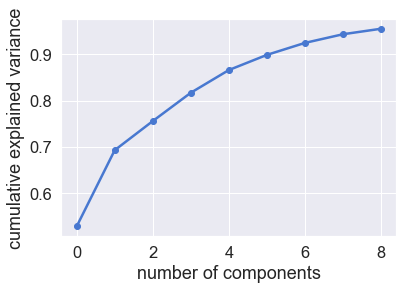

In [44]:
#Explained variance

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [45]:
cov_matrix = np.cov(X.T)
#print('Covariance Matrix \n%s', cov_matrix)

In [46]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
#print('Eigen Vectors \n%s', eigenvectors)
#print('\n Eigen Values \n%s', eigenvalues)

In [47]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
#print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
#print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

In [48]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

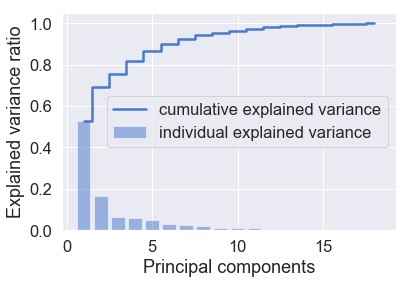

In [49]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

## Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [50]:
vehicle_class_df.head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int32

In [51]:
y = vehicle_class_df

#### Test-Train Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=42)

#### Preparing parameters for Grid Search operation

In [53]:
parameter_candidates = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']},
]

In [54]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### Best Score for Training data

In [55]:
# View the accuracy score
print('Best score for Training data:', clf.best_score_)

Best score for Training data: 0.9332161687170475


#### Best parameters for model obtained from Grid Search CV

In [56]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)

Best C: 1
Best Kernel: rbf


#### Apply the classifier trained using training data to test data, and view the accuracy score

In [57]:
# Apply the classifier trained using training data to test data, and view the accuracy score
clf.score(X_test, y_test) 

0.9426229508196722

#### Train a new classifier using the best parameters found by the grid search
#### As seen below the score matches the score obtained from above cell which indicates a success !

In [58]:
# Train a new classifier using the best parameters found by the grid search
svm.SVC(C=1, kernel='rbf').fit(X_train, y_train).score(X_test, y_test)

0.9426229508196722

In [59]:
svc_model = SVC(kernel='rbf', C=1.0)

#### KFold Cross Validation being performed to verify the accuracy

In [60]:
kfold = model_selection.KFold(n_splits=10, random_state=42)

In [61]:
results = model_selection.cross_val_score(svc_model, X_train, y_train, scoring='r2', cv=kfold)


print("Cross Validation Test R Squared  "  )
print((results[0:11]))
print("*****************")
print("R Squared: %.3f " % (results.mean()))

Cross Validation Test R Squared  
[0.87463343 0.44190601 0.85098039 0.93916756 0.90046566 0.93317702
 1.         0.8259542  0.77039275 0.4629156 ]
*****************
R Squared: 0.800 


#### As seen below, the score from KFold Cross Validation matches with the Grid Search CV score (using best parameters)

In [62]:
# Test R^2
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print(svc_model.score(X_test, y_test))

0.9426229508196722


In [63]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[ 60   2   0]
 [  0 125   1]
 [  0  11  45]]


#### Utility function to visualize the output of the PCA operation

In [64]:
# Utility function to visualize the outputs of PCA and t-SNE

def vehicle_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [65]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]
pca_df['pca5'] = pca_result[:,4]
pca_df['pca6'] = pca_result[:,5]
pca_df['pca7'] = pca_result[:,6]
pca_df['pca8'] = pca_result[:,7]
pca_df['pca9'] = pca_result[:,8]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.52860681 0.16436219 0.06276644 0.06112149 0.04896111 0.03268625
 0.02586101 0.01865407 0.01186089]


(<Figure size 576x576 with 1 Axes>,
 [Text(1.361880449172304, 0.9611076566524441, '0'),
  Text(-2.3411094767204332, -0.042485387025082214, '1'),
  Text(1.6627507523494438, -0.0007587592134715024, '2')])

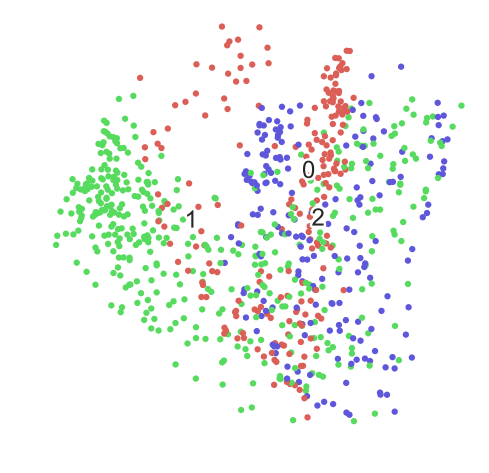

In [66]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

vehicle_scatter(top_two_comp.values,y) # Visualizing the PCA output

#### T-SNE (t-Distributed Stochastic Neighbor Embedding) operation used to visualize multi-dimensional data to two or more dimensions suitable for human observation

In [67]:
from sklearn.manifold import TSNE

time_start = time.time()

vehicle_tsne = TSNE(random_state=RS).fit_transform(pca_result) # applying tsne on pca output

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 5.915226697921753 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-4.6109385, 4.320998, '0'),
  Text(18.874327, -4.073065, '1'),
  Text(-14.7991705, 5.9513893, '2')])

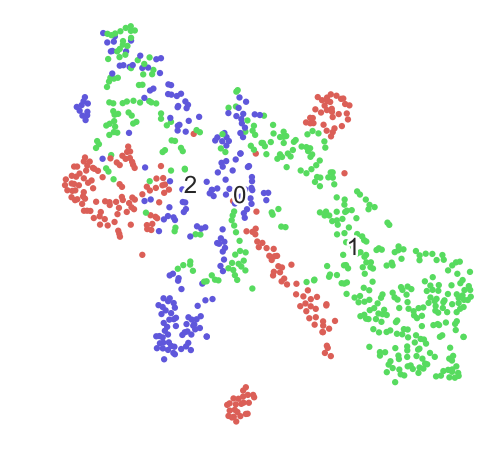

In [68]:
vehicle_scatter(vehicle_tsne, y)

In [69]:
vehicle_tsne

array([[-11.29594  , -13.964176 ],
       [-15.874316 ,  -7.8154554],
       [ 35.839962 , -11.81545  ],
       ...,
       [ 26.8462   , -19.790518 ],
       [ -3.6534317,  22.579327 ],
       [-22.958355 ,  21.3291   ]], dtype=float32)

In [70]:
vehicle_tsne_df = pd.DataFrame.from_records(vehicle_tsne)
vehicle_tsne_df

,0,1
0,-11.295940,-13.964176
1,-15.874316,-7.815455
2,35.839962,-11.815450
3,-0.802277,6.772588
4,-23.384195,-4.044008
5,0.398175,-1.890072
6,-8.633493,5.457235
7,-2.897641,17.897543
8,-2.550284,14.983960
9,-4.015035,19.930202


In [71]:
vehicle_tsne_df.values

array([[-11.2959404 , -13.96417618],
       [-15.87431622,  -7.81545544],
       [ 35.83996201, -11.81544971],
       ...,
       [ 26.84620094, -19.79051781],
       [ -3.65343165,  22.57932663],
       [-22.95835495,  21.32909966]])

#### Visualizing the SVM plot with the best parameters obtained from Grid Search CV applied to a Linear kernel

Text(0.5, 1.0, 'SVM Decision Region Boundary')

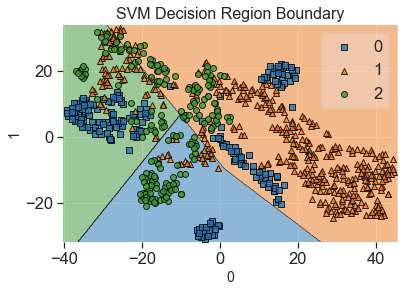

In [72]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
# Fit Support Vector Machine Classifier

clf = svm.SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
clf.fit(vehicle_tsne_df.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=vehicle_tsne_df.values, 
                      y=y.values,
                      clf=clf, 
                      legend='upper right')

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(vehicle_tsne_df.columns[0], size=14)
plt.ylabel(vehicle_tsne_df.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)


#### Visualizing the SVM plot with the best parameters obtained from Grid Search CV applied to an RBF kernel

Text(0.5, 1.0, 'SVM Decision Region Boundary')

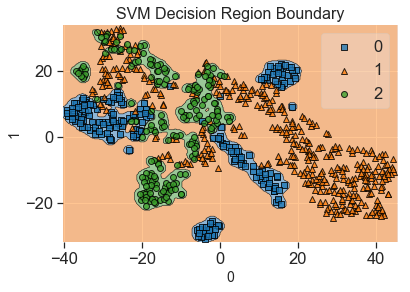

In [73]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
# Fit Support Vector Machine Classifier

clf = svm.SVC(kernel='rbf', C=1.0, decision_function_shape='ovo')
clf.fit(vehicle_tsne_df.values, y.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=vehicle_tsne_df.values, 
                      y=y.values,
                      clf=clf, 
                      legend='upper right')

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(vehicle_tsne_df.columns[0], size=14)
plt.ylabel(vehicle_tsne_df.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)